In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FuncFormatter

# Set the style
#sns.set_palette('pastel')
specical_color = 'tab20'
Accent = 'Accent'
Set1 = 'Set1'
Pastel1 = 'Pastel1'
Paired = 'Paired'
sns.set_palette(specical_color)

In [2]:
file_path = 'D:/study_master/UCL/OSeMOSYS_Workspace/OSeMOSYS_Diffusion_Kenya/out/'

old_model_data_file_path = file_path + 'ref_absolute'
new_model_data_file_path = file_path + 'ScenarioA/ScenarioA_itr_2'

Scenario_A_name = 'Old Model: Absolute Growth Constraint'
Scenario_B_name = 'Revised Model: Iterative Growth Constraint'

In [3]:
def get_energy_supply_capacity_101(data_file_path):
    full_path_capacity = data_file_path + '/TotalCapacityAnnual.csv'
    total_annual_capacity = pd.read_csv(full_path_capacity, index_col=None, header=0)
    total_annual_capacity = total_annual_capacity[total_annual_capacity['t'].str.endswith('101')]

    total_annual_capacity = total_annual_capacity.groupby(['t', 'y']).agg({'TotalCapacityAnnual': 'sum'}).reset_index()
    total_annual_capacity_pivoted = total_annual_capacity.pivot(index='y', columns='t', values='TotalCapacityAnnual')

    all_technologies = ['PWRGEO101','PWRHYD101','PWRSOL101','PWRWND101']
    total_annual_capacity_pivoted = total_annual_capacity_pivoted.reindex(columns=all_technologies, fill_value=0)

    return total_annual_capacity_pivoted


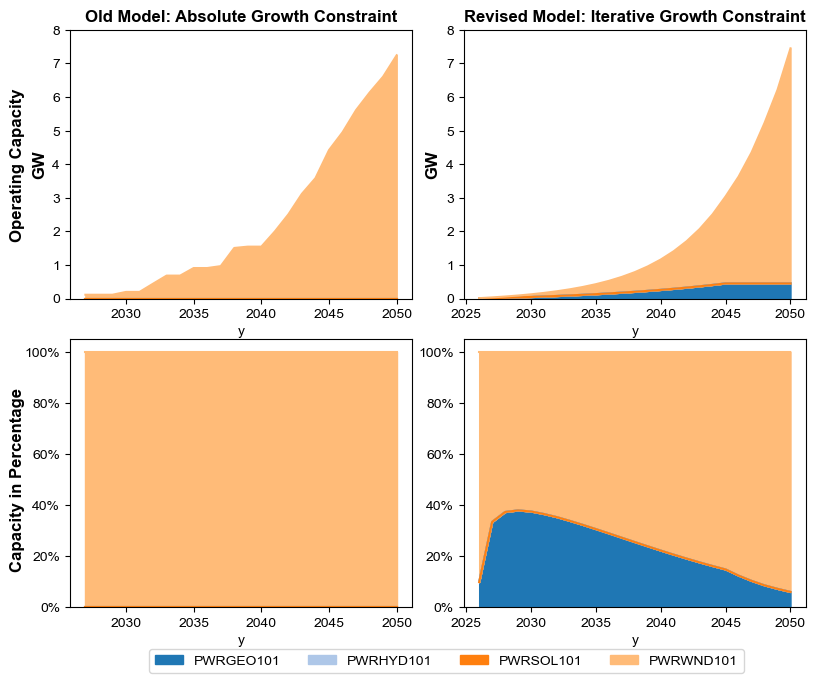

In [4]:
plt.rcParams.update({'font.family': 'Arial'})

# Create a 2x2 grid
fig = plt.figure(figsize=(9.5,7.5))
gs = gridspec.GridSpec(2, 2, wspace=0.15, hspace=0.15)
axes = [plt.subplot(gs[i, j]) for i in range(2) for j in range(2)]

# Add the column titles above the plot
fig.text(0.07, 0.7, 'Operating Capacity', rotation='vertical', 
         verticalalignment='center', fontsize=12, horizontalalignment='center', fontweight='bnew')
fig.text(0.07, 0.28, 'Capacity in Percentage', rotation='vertical', 
         verticalalignment='center', fontsize=12, horizontalalignment='center', fontweight='bnew')

# Set the row titles for the scenarios
axes[0].set_title(Scenario_A_name, fontsize=12, fontweight='bold')
axes[1].set_title(Scenario_B_name, fontsize=12, fontweight='bold')

# Load the data
Scenario_A_capacity_101 = get_energy_supply_capacity_101(old_model_data_file_path)
Scenario_B_capacity_101 = get_energy_supply_capacity_101(new_model_data_file_path)

# Set the maximum y-value for the plots
max_y = 8

# Plot Operating Capacity for both scenarios
Scenario_A_capacity_101.plot(kind='area', ax=axes[0], legend=False)
axes[0].set_ylim([0, max_y])
axes[0].set_ylabel('GW', fontsize=12, fontweight='bold')

Scenario_B_capacity_101.plot(kind='area', ax=axes[1], legend=False)
axes[1].set_ylim([0, max_y])
axes[1].set_ylabel('GW', fontsize=12, fontweight='bold')

# Calculate capacity percentages
Scenario_A_capacity_percentage_101 = Scenario_A_capacity_101.div(Scenario_A_capacity_101.sum(axis=1), axis=0)
Scenario_B_capacity_percentage_101 = Scenario_B_capacity_101.div(Scenario_B_capacity_101.sum(axis=1), axis=0)

# Create a formatter to display percentages
formatter = FuncFormatter(lambda y, _: f'{100 * y:.0f}%')

# Plot Capacity Percentage for both scenarios
Scenario_A_capacity_percentage_101.plot(kind='area', ax=axes[2], legend=False)
axes[2].yaxis.set_major_formatter(formatter)

Scenario_B_capacity_percentage_101.plot(kind='area', ax=axes[3], legend=False)
axes[3].yaxis.set_major_formatter(formatter)

# Add legend in the lower center of the last plot
axes[3].legend(loc='lower center', bbox_to_anchor=(-0.05, -0.27), ncol=5)

plt.show()


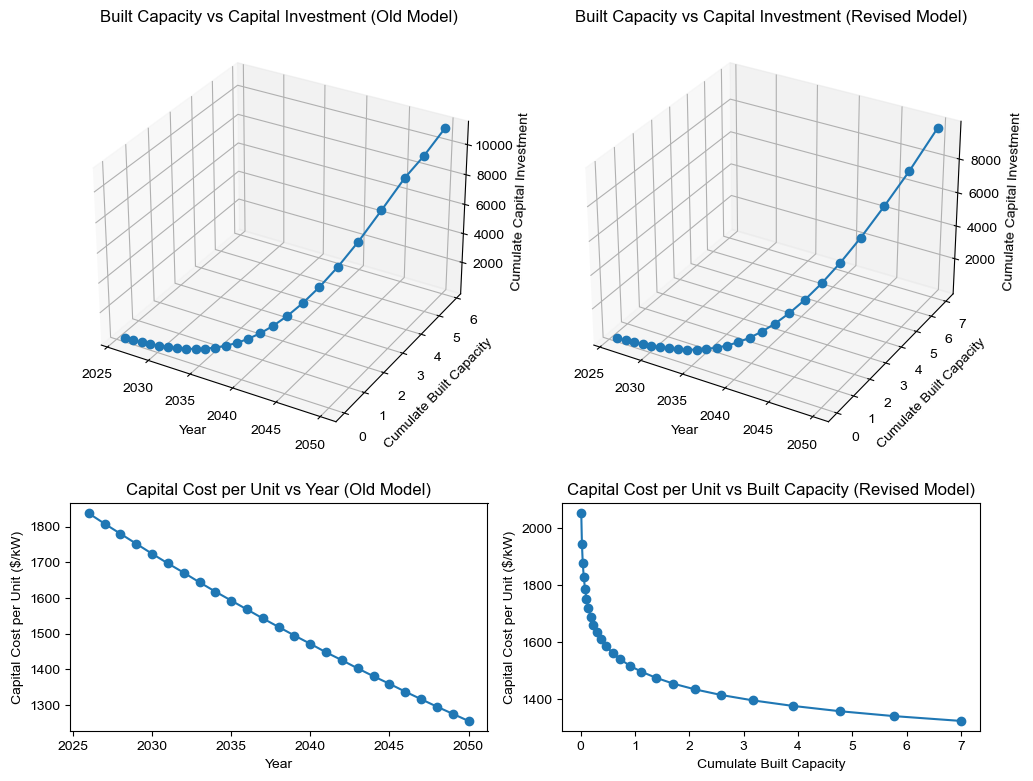

In [40]:
import matplotlib.pyplot as plt
import numpy as np

# Data
years = np.array([2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036, 2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048, 2049, 2050])

old_total_capacity = np.array([0.01, 0.0223, 0.0373, 0.0558, 0.0785, 0.1063, 0.1404, 0.1823, 0.2336, 0.2967, 0.374, 0.4689, 0.5854, 0.7283, 0.9036, 1.1187, 1.3826, 1.7065, 2.1039, 2.5915, 3.1797, 3.8993, 4.6513, 5.1572, 5.8137])
old_total_capital_investment = np.array([20.0529, 44.5759, 74.5654, 111.24, 156.0896, 210.9368, 278.0102, 360.0348, 460.3439, 583.0133, 733.0267, 916.4803, 1140.8273, 1415.1847, 1750.6989, 2162.3748, 2667.5012, 3287.2912, 4047.7736, 4980.8855, 6125.8138, 7526.2965, 8994.4331, 9997.9673, 11297.6671])
old_annual_new_capacity = np.array([0.01, 0.0123, 0.0151, 0.0185, 0.0227, 0.0278, 0.0341, 0.0419, 0.0514, 0.063, 0.0773, 0.0949, 0.1164, 0.1429, 0.1753, 0.2151, 0.2639, 0.3239, 0.3974, 0.4876, 0.5983, 0.7318, 0.7671, 0.5244, 0.6791])
old_anuual_capital_investment = np.array([20.0529, 24.523, 29.9895, 36.6746, 44.8496, 54.8472, 67.0734, 82.0246, 100.3091, 122.6694, 150.0134, 183.4536, 224.347, 274.3574, 335.5142, 411.6759, 505.1264, 619.79, 760.4824, 933.1119, 1144.9283, 1400.4827, 1468.1366, 1003.5342, 1299.6998])
old_unit_capital_cost = np.array([1837, 1808, 1780, 1752, 1724, 1697, 1671, 1644, 1618, 1593, 1568, 1543, 1519, 1495, 1472, 1448, 1426, 1403, 1381, 1360, 1338, 1317, 1296, 1276, 1256])


new_total_capacity = np.array([0.01, 0.0223, 0.0373, 0.0558, 0.0785, 0.1063, 0.1404, 0.1823, 0.2336, 0.2967, 0.374, 0.4689, 0.5854, 0.7283, 0.9036, 1.1187, 1.3826, 1.7065, 2.1039, 2.5915, 3.1797, 3.8993, 4.7793, 5.7642, 7.0007])
new_total_capital_investment = np.array([20.53, 44.3952, 72.6841, 106.4709, 146.998, 195.7236, 254.3838, 325.1037, 410.4899, 513.5567, 638.086, 788.6057, 970.4986, 1190.5378, 1456.4936, 1778.304, 2167.6225, 2638.5152, 3208.353, 3897.7924, 4732.3676, 5739.3205, 6956.6971, 8311.2118, 9987.6354])
new_annual_new_capacity = np.array([0.01, 0.0123, 0.0151, 0.0185, 0.0227, 0.0278, 0.0341, 0.0419, 0.0514, 0.063, 0.0773, 0.0949, 0.1164, 0.1429, 0.1753, 0.2151, 0.2639, 0.3239, 0.3974, 0.4876, 0.5983, 0.7318, 0.8951, 1.0033, 1.2592])
new_anuual_capital_investment = np.array([20.53, 23.8652, 28.2889, 33.7868, 40.5271, 48.7256, 58.6602, 70.7199, 85.3862, 103.0668, 124.5293, 150.5197, 181.8929, 220.0392, 265.9558, 321.8104, 389.3185, 470.8927, 569.8378, 689.4394, 834.5752, 1006.9529, 1217.3766, 1354.5147, 1676.4236])
new_unit_capital_cost = np.array([2053, 1945, 1879, 1829, 1788, 1752, 1719, 1689, 1662, 1635, 1610, 1586, 1562, 1540, 1517, 1496, 1475, 1454, 1434, 1414, 1395, 1376, 1357, 1340, 1323])

# Create the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8), gridspec_kw={'height_ratios': [2, 1]})


# Subfigure 1: Old Total Capacity vs Old Total Capital Investment (3D)
ax1 = fig.add_subplot(221, projection='3d')
ax1.plot(years, old_total_capacity, old_total_capital_investment, marker='o')
ax1.set_xlabel('Year')
ax1.set_ylabel('Cumulate Built Capacity')
ax1.set_zlabel('Cumulate Capital Investment')
ax1.set_title('Built Capacity vs Capital Investment (Old Model)')

# Subfigure 2: New Total Capacity vs New Total Capital Investment (3D)
ax2 = fig.add_subplot(222, projection='3d')
ax2.plot(years, new_total_capacity, new_total_capital_investment, marker='o')
ax2.set_xlabel('Year')
ax2.set_ylabel('Cumulate Built Capacity')
ax2.set_zlabel('Cumulate Capital Investment')
ax2.set_title('Built Capacity vs Capital Investment (Revised Model)')

# remove the axs[0, 0] and axs[0, 1] outline and axis
axs[0, 0].axis('off')
axs[0, 1].axis('off')


# Subfigure 3: Old Annual New Capacity vs Old Annual Capital Investment (2D)
axs[1, 0].plot(years, old_unit_capital_cost, marker='o')
axs[1, 0].set_xlabel('Year')
axs[1, 0].set_ylabel('Capital Cost per Unit ($/kW)')
axs[1, 0].set_title('Capital Cost per Unit vs Year (Old Model)')

# Subfigure 4: New Annual New Capacity vs New Annual Capital Investment (2D)
axs[1, 1].plot(new_total_capacity, new_unit_capital_cost, marker='o')
#axs[1, 1].set_xscale('log')  # Set x-axis to log scale
axs[1, 1].set_xlabel('Cumulate Built Capacity')
axs[1, 1].set_ylabel('Capital Cost per Unit ($/kW)')
axs[1, 1].set_title('Capital Cost per Unit vs Built Capacity (Revised Model)')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


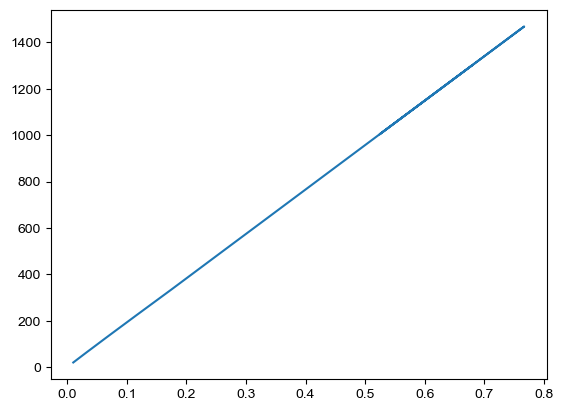